# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#Output
output_df = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

# # Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
counter = 0
record_count = 1
set_count = 1

# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    #     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    

#     # Create endpoint URL with each city
    city_url = query_url + city
    
#     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
    record_count += 1

# Parse the JSON and retrieve data
        
#     # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?appid=ea9bc12504dc8ca848d20c981c0d5f12&units=metric&q=
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mandal
Processing Record 2 of Set 1 | udachnyy
Processing Record 3 of Set 1 | tuatapere
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | gurlan
Processing Record 7 of Set 1 | kpandu
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | eureka
Processing Record 14 of Set 1 | port-cartier
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | moundou
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | jamestown
Proc

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mandal,25.4500,74.5667,13.57,63,0,0.46,IN,1674530914
1,udachnyy,66.4167,112.4000,-30.31,74,100,1.62,RU,1674530915
2,tuatapere,-46.1333,167.6833,17.73,47,7,3.89,NZ,1674530916
3,busselton,-33.6500,115.3333,28.76,41,21,5.03,AU,1674530916
4,gurlan,41.8447,60.3919,-12.96,35,7,2.51,UZ,1674530918


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv(output_df, index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv(output_df, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mandal,25.4500,74.5667,13.57,63,0,0.46,IN,1674530914
1,udachnyy,66.4167,112.4000,-30.31,74,100,1.62,RU,1674530915
2,tuatapere,-46.1333,167.6833,17.73,47,7,3.89,NZ,1674530916
3,busselton,-33.6500,115.3333,28.76,41,21,5.03,AU,1674530916
4,gurlan,41.8447,60.3919,-12.96,35,7,2.51,UZ,1674530918


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

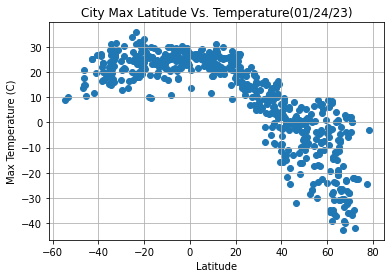

In [10]:
# Build scatter plot for latitude vs. temperature

city_lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloud = city_data_df["Cloudiness"]
windspeed = city_data_df["Wind Speed"]

plt.scatter(city_lat, max_temp)

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1_lat_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

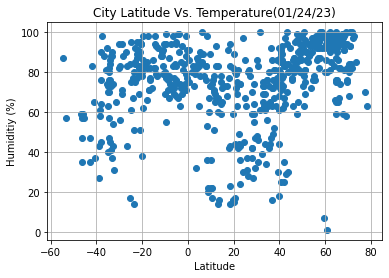

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_lat, humidity)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Humiditiy (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2_lat_hum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

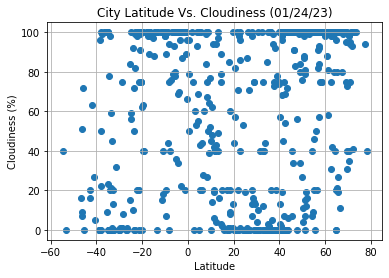

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_lat,cloud)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3_lat_cld.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

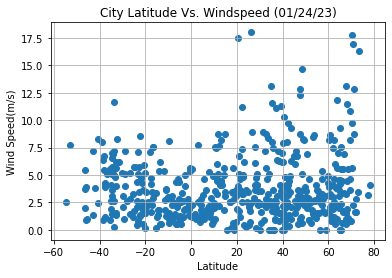

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_lat, windspeed)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Windspeed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4_lat_ws.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
       
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mandal,25.4500,74.5667,13.57,63,0,0.46,IN,1674530914
1,udachnyy,66.4167,112.4000,-30.31,74,100,1.62,RU,1674530915
4,gurlan,41.8447,60.3919,-12.96,35,7,2.51,UZ,1674530918
5,kpandu,6.9954,0.2931,25.51,78,60,1.93,GH,1674530918
7,qaanaaq,77.4840,-69.3632,-24.42,70,94,3.22,GL,1674530920


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tuatapere,-46.1333,167.6833,17.73,47,7,3.89,NZ,1674530916
3,busselton,-33.6500,115.3333,28.76,41,21,5.03,AU,1674530916
6,punta arenas,-53.1500,-70.9167,10.06,57,0,7.72,CL,1674530919
8,puerto ayora,-0.7393,-90.3518,23.64,98,89,1.34,EC,1674530921
9,port elizabeth,-33.9180,25.5701,21.84,86,0,11.62,ZA,1674530921


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8415072024306544


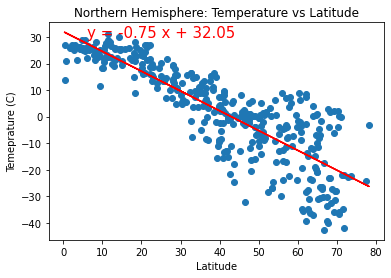

In [73]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.title("Northern Hemisphere: Temperature vs Latitude")
plt.ylabel("Temeprature (C)")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))
plt.show()


The r-squared is: 0.3523655966999889


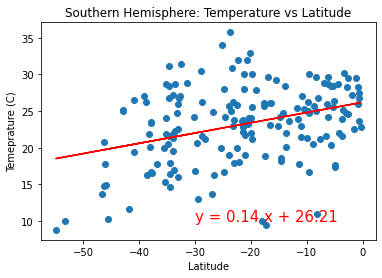

In [74]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.title("Southern Hemisphere: Temperature vs Latitude")
plt.ylabel("Temeprature (C)")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,10))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In Northern Hemisphere, there is a negative correlation between the temparature and location. This means as you go further away from the equator, the colder it gets. 

The second linear regression graph shows the opposite for Southern Hemisphere. There is a positive correlation between two factors. The temperature increases as it move closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.41767113216993956


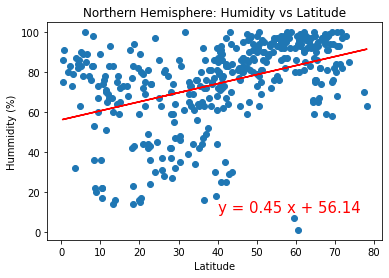

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.title("Northern Hemisphere: Humidity vs Latitude")
plt.ylabel("Hummidity (%)")
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))
plt.show()

The r-squared is: 0.41262083048797205


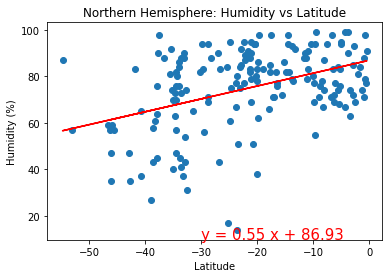

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.title("Northern Hemisphere: Humidity vs Latitude")
plt.ylabel("Humidity (%)")
plot_linear_regression(x_values,y_values, 'Humidity', (-30,10))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For Northen Hemisphere:
    regression line is y= -.0.45x + 56.14, and
    r2 =  0.41767113216993956 (no display of strong linear relationsip)

For Southern Hemisphere:
    regression line is y= 0.55x + 86.93, and
    r2 =  0.41262083048797205 (no display of strong linear relationsip)

For both, Northern and Sotuhern hemispheres, there is no strong correlation between Latitude and the Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3373239398633024


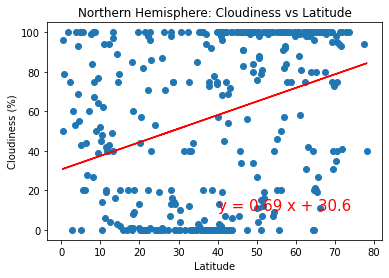

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]

plt.title("Northern Hemisphere: Cloudiness vs Latitude")
plt.ylabel("Cloudiness (%)")
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))
plt.show()

The r-squared is: 0.5046486549439462


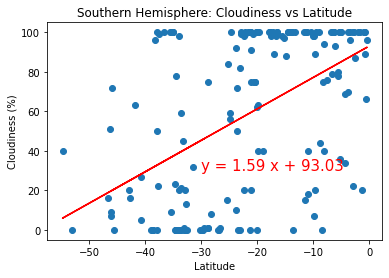

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]

plt.title("Southern Hemisphere: Cloudiness vs Latitude")
plt.ylabel("Cloudiness (%)")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE


For Northen Hemisphere:
    regression line is y= -.0.69x + 30.6, and
    r2 = 0.3373239398633024 (no display of strong linear relationsip)

For Southern Hemisphere:
    regression line is y= 1.59x + 93.03, and
    r2 =  0.5046486549439462 (no display of strong linear relationsip)

As seen in the two visualisations for Cloudiness and Latitude in Northern and Southern hemispheres, it is observed that there is no strong linear correlation between two datasets. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.10360365646782628


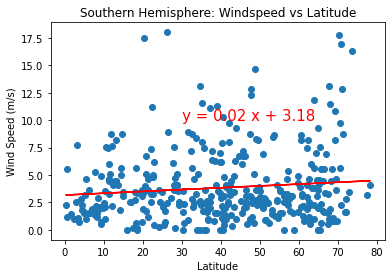

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]

plt.title("Northern Hemisphere: Windspeed vs Latitude")
plt.ylabel("Wind Speed (m/s)")
plot_linear_regression(x_values,y_values, 'Wind Speed', (30,10))

plt.show()

The r-squared is: -0.3254518377076461


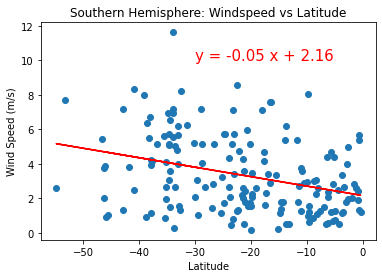

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]

plt.title("Southern Hemisphere: Windspeed vs Latitude")
plt.ylabel("Wind Speed (m/s)")
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,10))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For Northen Hemisphere:
    regression line is y= -.0.02x + 3.18, and
    r2 = 0.10360365646782628 (no display of linear relationsip)

For Southern Hemisphere:
    regression line is y= -.0.05x +2.16, and
    r2 = -0.3254518377076461 (no display of linear relationsip)


Overall, there is no strong correlation between Wind Speed and Latitude in both Northern and Southern Hemisphere.

